importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.style.use("fivethirtyeight")
import math
!pip install scikit-learn==1.7.1 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
!pip install xgboost
from xgboost import XGBClassifier
!pip install lightgbm catboost
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Loading the dataset

In [2]:
train = pd.read_csv(r"E:\Campus docs\Degree\Sem 2\CI\My Assignment\rainfall-prediction\train.csv")
test = pd.read_csv(r"E:\Campus docs\Degree\Sem 2\CI\My Assignment\rainfall-prediction\test.csv")

# Understanding the dataset

In [3]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [4]:
train.tail()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1
2189,2189,365,1013.8,21.2,19.1,18.0,18.0,89.0,88.0,1.0,70.0,48.0,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2190.0,1094.500000,632.342866,0.0,547.250,1094.50,1641.750,2189.0
day,2190.0,179.948402,105.203592,1.0,89.000,178.50,270.000,365.0
pressure,2190.0,1013.602146,5.655366,999.0,1008.600,1013.00,1017.775,1034.6
maxtemp,2190.0,26.365799,5.654330,10.4,21.300,27.80,31.200,36.0
temparature,2190.0,23.953059,5.222410,7.4,19.300,25.50,28.400,31.5
mintemp,2190.0,22.170091,5.059120,4.0,17.700,23.85,26.400,29.8
dewpoint,2190.0,20.454566,5.288406,-0.3,16.800,22.15,25.000,26.7
humidity,2190.0,82.036530,7.800654,39.0,77.000,82.00,88.000,98.0
cloud,2190.0,75.721918,18.026498,2.0,69.000,83.00,88.000,100.0
sunshine,2190.0,3.744429,3.626327,0.0,0.400,2.40,6.800,12.1


In [7]:
print(train.columns)
print(test.columns)

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')
Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')


In [8]:
train.shape

(2190, 13)

In [9]:
train['rainfall'].unique()

array([1, 0], dtype=int64)

# Data Visualization

C:\Users\USER\AppData\Local\Temp\ipykernel_19580\104983202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='rainfall', palette='Blues')


<Axes: xlabel='rainfall', ylabel='count'>

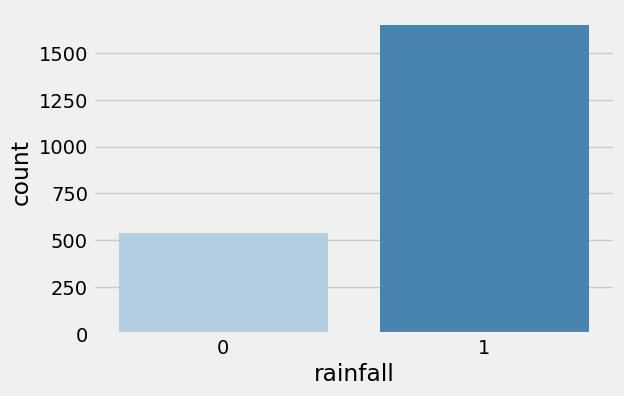

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='rainfall', palette='Blues')

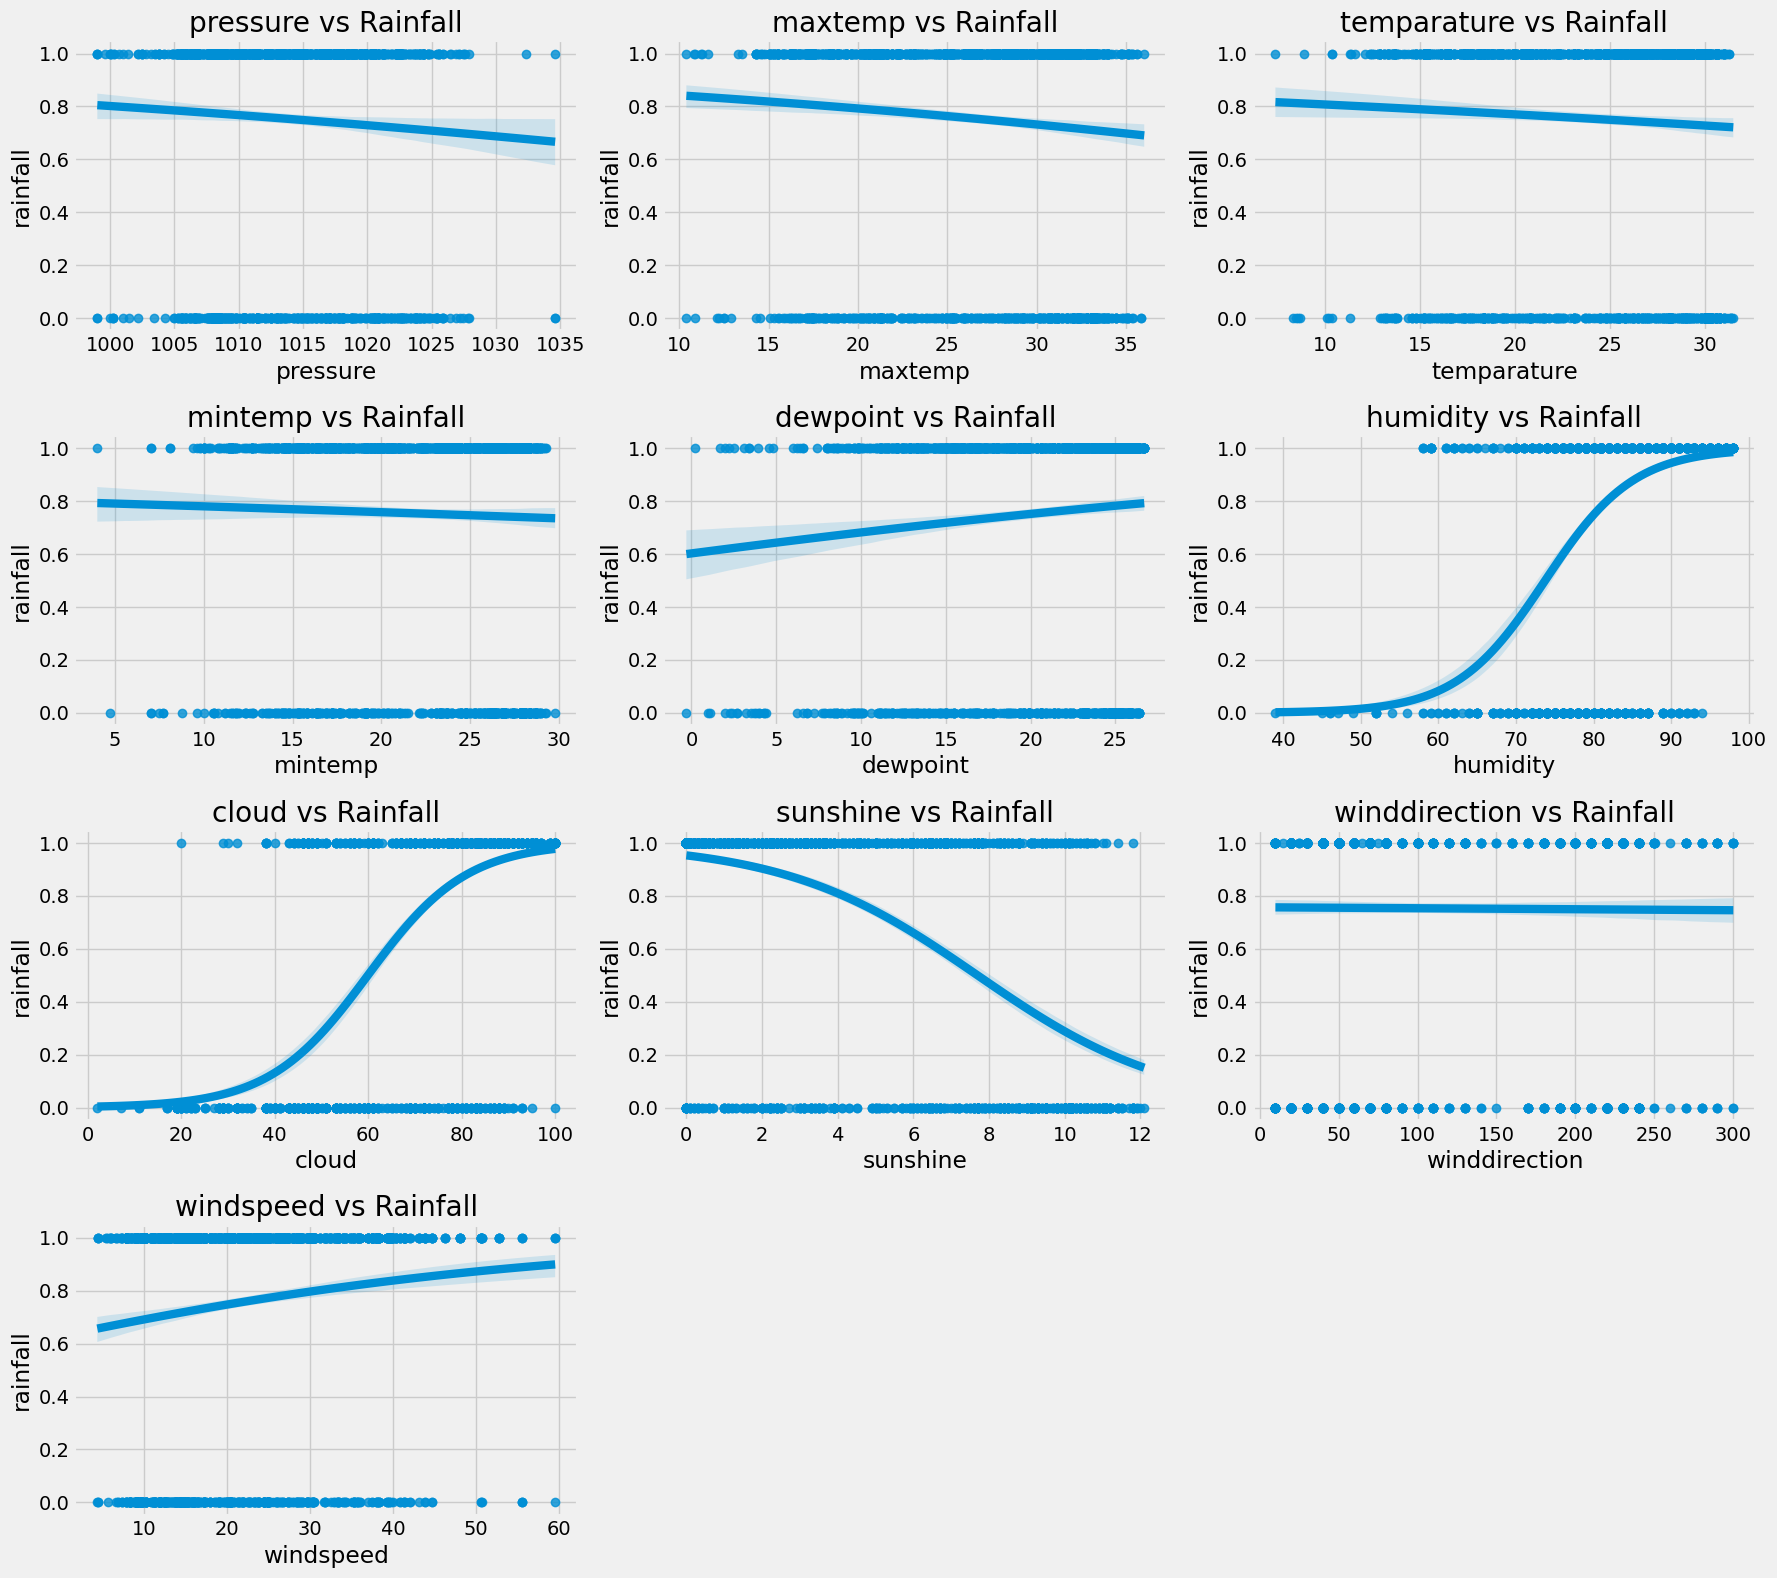

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['pressure', 'maxtemp', 'temparature', 'mintemp',
        'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
        'windspeed']

cols_per_row = 3
n_rows = (len(cols) + cols_per_row - 1) // cols_per_row  # calculate number of rows

fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(6*cols_per_row, 4*n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.regplot(x=train[col], y=train['rainfall'], logistic=True, ax=axes[i])
    axes[i].set_title(f'{col} vs Rainfall')

# Hide any unused subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

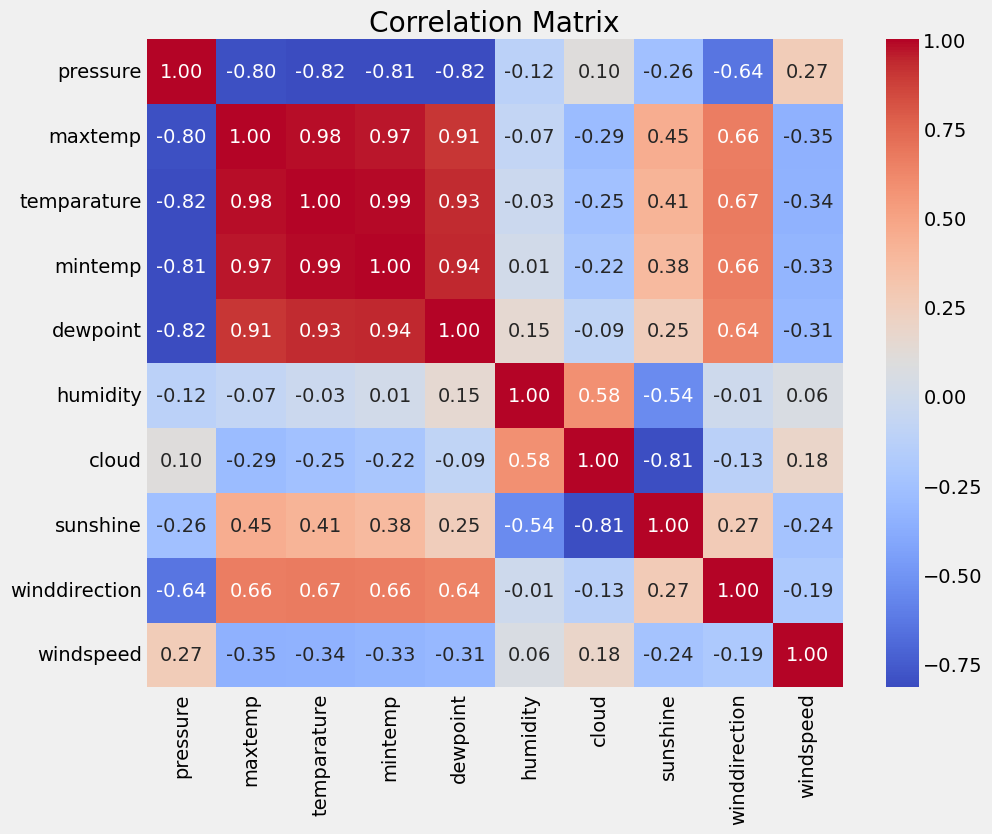

In [12]:
#Heat map

columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
           'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

plt.figure(figsize=(10, 8))
sns.heatmap(train[columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

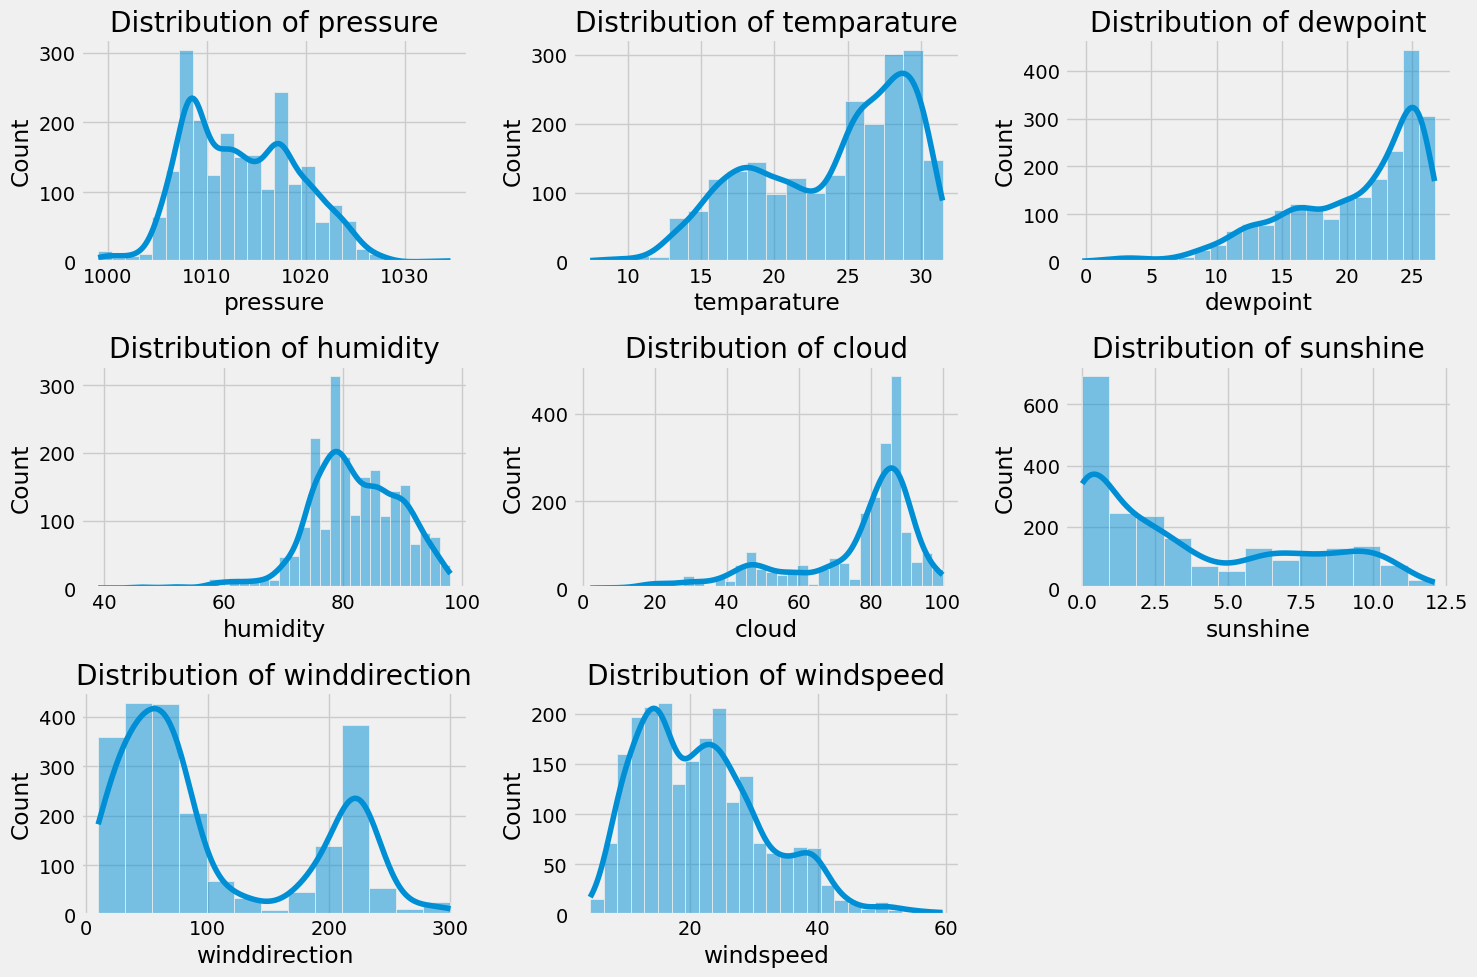

In [13]:
columns = ['pressure', 'temparature', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

plt.figure(figsize = (15,10))

for i, column in enumerate(columns,1):
    plt.subplot(3, 3, i)
    sns.histplot(train[column], kde = True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

# Data cleaning and Preprocessing

## Handling missing values

In [14]:
train.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [15]:
test.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [16]:
test['winddirection'].fillna(test['winddirection'].mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_19580\723861417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['winddirection'].fillna(test['winddirection'].mean(), inplace=True)


In [17]:
test.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [18]:
train.isnull().sum()/train.shape[0]*100

id               0.0
day              0.0
pressure         0.0
maxtemp          0.0
temparature      0.0
mintemp          0.0
dewpoint         0.0
humidity         0.0
cloud            0.0
sunshine         0.0
winddirection    0.0
windspeed        0.0
rainfall         0.0
dtype: float64

In [19]:
test.isnull().sum()/test.shape[0]*100

id               0.0
day              0.0
pressure         0.0
maxtemp          0.0
temparature      0.0
mintemp          0.0
dewpoint         0.0
humidity         0.0
cloud            0.0
sunshine         0.0
winddirection    0.0
windspeed        0.0
dtype: float64

## Handling duplicate values

In [20]:
train.duplicated().sum()

0

## Feature Selection

In [21]:
# Create copies of both train and test data for linear models
train_dropped = train.copy()
test_dropped = test.copy()

In [22]:
#Feature Selection

# Columns to drop
cols_to_drop = ['id','day','maxtemp','mintemp']

# Drop from train and test
train_dropped.drop(columns=cols_to_drop, inplace=True, errors='ignore')
test_ids = test_dropped[['id']].copy()
test_dropped.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [23]:
print(train_dropped.columns)
print(test_dropped.columns)

Index(['pressure', 'temparature', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed', 'rainfall'],
      dtype='object')
Index(['pressure', 'temparature', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')


## Feature Transformation

In [24]:
# Checking numerical skewness value
print(train_dropped[['humidity', 'windspeed','dewpoint','cloud']].skew())

humidity    -0.561541
windspeed    0.769390
dewpoint    -0.997889
cloud       -1.339274
dtype: float64


In [25]:
# List of features to transform
features_to_transform = ['windspeed']

# Function to apply safe log transformation
def safe_log_transform(df, col):
    if (df[col] <= 0).any():
        min_val = df[col].min()
        min_val = df[col].min()
        return np.log1p(df[col] - min_val + 1)
    else:
        return np.log1p(df[col])

# Apply transformations to training data
for col in features_to_transform:
    train_dropped[f'{col}_log'] = safe_log_transform(train_dropped, col)

# Apply transformations to test data
for col in features_to_transform:
    test_dropped[f'{col}_log'] = safe_log_transform(test_dropped, col)

print("Log transformations applied successfully to train and test datasets!")

Log transformations applied successfully to train and test datasets!


In [26]:
# Check skewness of transformed columns in train
skewness_after = train_dropped[['windspeed_log']].skew()

print("Skewness After Log Transformation:")
print(skewness_after)

Skewness After Log Transformation:
windspeed_log   -0.160858
dtype: float64


In [27]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

transformed_features = pt.fit_transform(train_dropped[['dewpoint', 'cloud']])
train_dropped['dewpoint_yeo'] = transformed_features[:, 0]
train_dropped['cloud_yeo'] = transformed_features[:, 1]

# Apply to test data using the same fitted transformer
transformed_features_test = pt.transform(test_dropped[['dewpoint', 'cloud']])

test_dropped['dewpoint_yeo'] = transformed_features_test[:, 0]
test_dropped['cloud_yeo'] = transformed_features_test[:, 1]

In [28]:
# Check skewness of transformed columns in train
train_dropped[['dewpoint_yeo', 'cloud_yeo']].skew()

dewpoint_yeo   -0.38142
cloud_yeo      -0.46189
dtype: float64

In [29]:
# Convert degrees to radians in train data
train_dropped['winddirection_rad'] = np.deg2rad(train_dropped['winddirection'])

# Create sine and cosine components
train_dropped['winddirection_sin'] = np.sin(train_dropped['winddirection_rad'])
train_dropped['winddirection_cos'] = np.cos(train_dropped['winddirection_rad'])

# Convert degrees to radians in test data
test_dropped['winddirection_rad'] = np.deg2rad(test_dropped['winddirection'])

# Create sine and cosine components
test_dropped['winddirection_sin'] = np.sin(test_dropped['winddirection_rad'])
test_dropped['winddirection_cos'] = np.cos(test_dropped['winddirection_rad'])

In [30]:
# Check skewness of transformed columns in train
train_dropped[['winddirection_sin', 'winddirection_cos']].skew()

winddirection_sin   -0.729030
winddirection_cos   -0.442073
dtype: float64

In [31]:
# Columns to drop
cols_to_drop = ['winddirection', 'winddirection_rad','windspeed','dewpoint','cloud']

# Drop from train and test
train_dropped.drop(columns=cols_to_drop, inplace=True, errors='ignore')
test_dropped.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [32]:
# Extract target variable for linear models
train_y = train_dropped["rainfall"]

# Get features by dropping the target column for linear model
train_dropped = train_dropped.drop(columns=["rainfall"])

In [33]:
print(train_dropped.columns)
print(test_dropped.columns)

Index(['pressure', 'temparature', 'humidity', 'sunshine', 'windspeed_log',
       'dewpoint_yeo', 'cloud_yeo', 'winddirection_sin', 'winddirection_cos'],
      dtype='object')
Index(['pressure', 'temparature', 'humidity', 'sunshine', 'windspeed_log',
       'dewpoint_yeo', 'cloud_yeo', 'winddirection_sin', 'winddirection_cos'],
      dtype='object')


## Handling Outliers

C:\Users\USER\AppData\Local\Temp\ipykernel_19580\1560452078.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train[column], palette="Set2", ax=ax)
C:\Users\USER\AppData\Local\Temp\ipykernel_19580\1560452078.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train[column], palette="Set2", ax=ax)
C:\Users\USER\AppData\Local\Temp\ipykernel_19580\1560452078.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train[column], palette="Set2", ax=ax)
C:\Users\USER\AppData\Local\Temp\ipykernel_19580\1560452078.py:15: FutureWarning: 

Pass

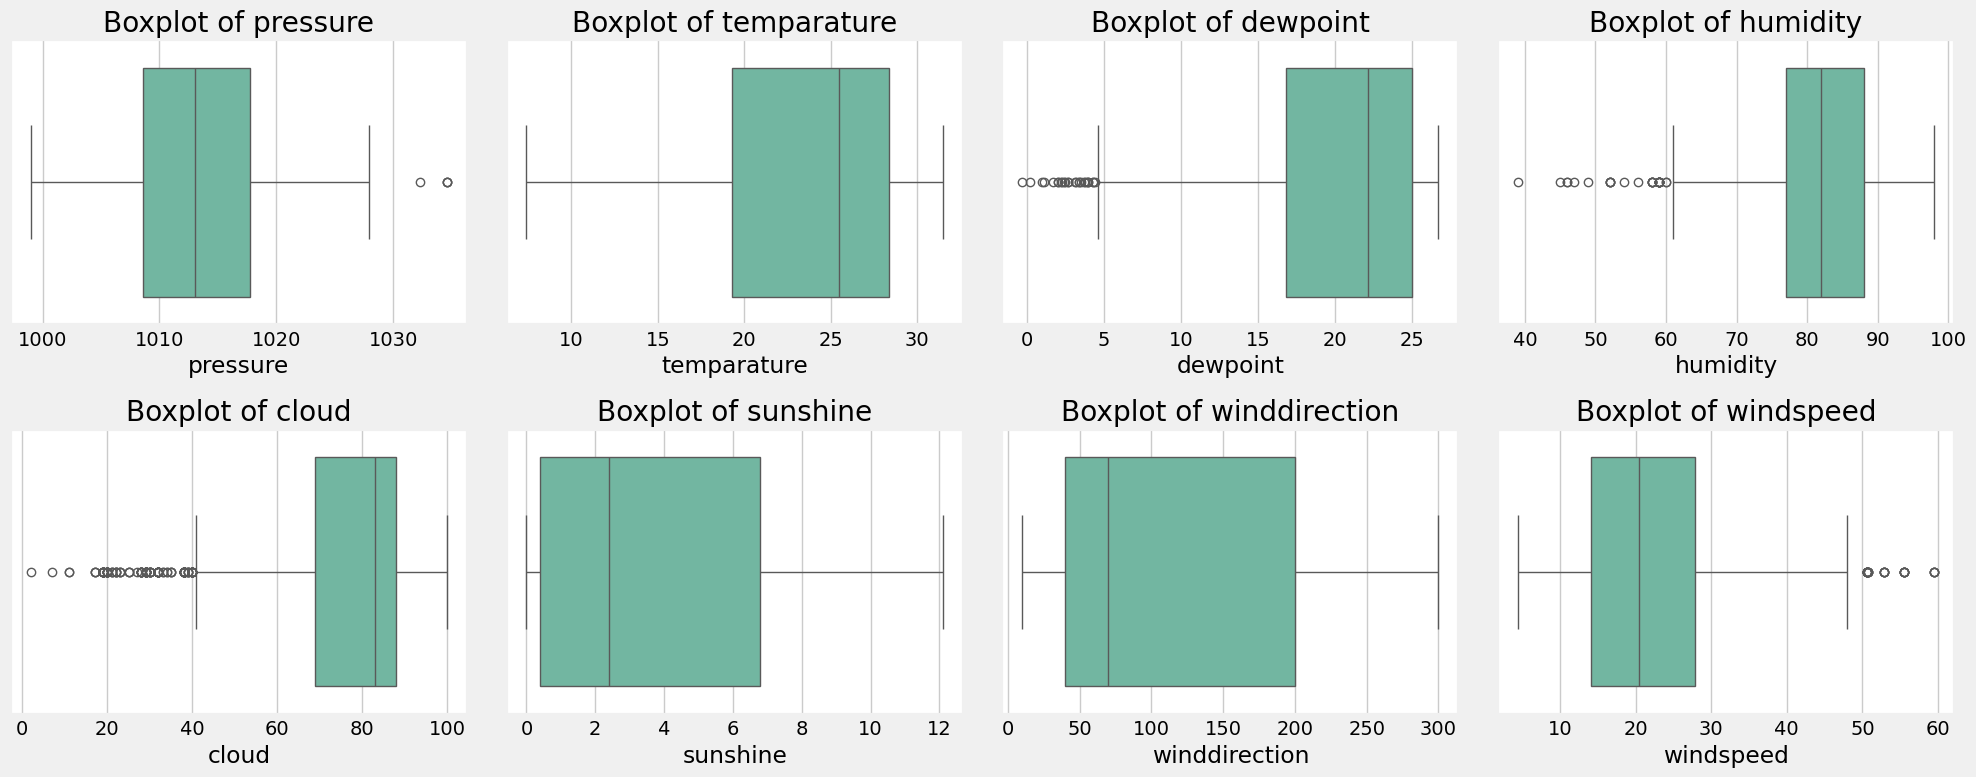

In [34]:
columns = ['pressure', 'temparature','dewpoint',
           'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

# Number of columns and rows
n_cols = len(columns)
cols_per_row = 4
n_rows = math.ceil(n_cols / cols_per_row)

# Create a figure
plt.figure(figsize=(20, 4 * n_rows))

# Create each boxplot
for i, column in enumerate(columns, 1):
    ax = plt.subplot(n_rows, cols_per_row, i)
    sns.boxplot(x=train[column], palette="Set2", ax=ax)

    # Style adjustments
    ax.set_facecolor("white")  # white background
    ax.patch.set_edgecolor("white")  # white border around each plot
    ax.patch.set_linewidth(2)
    ax.set_title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [35]:
# Return outliers for training set
columns = ['pressure', 'temparature', 'dewpoint_yeo',
                  'humidity', 'cloud_yeo', 'sunshine', 'winddirection_sin', 'winddirection_cos', 'windspeed_log']

def get_num_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Dictionary to store outliers for each column
outliers_dict = {}

# Identify outliers for all numerical columns
for col in columns:
    outliers_dict[col] = get_num_outliers(train_dropped, col)

# Create a DataFrame summarizing the outliers
outliers_summary = pd.DataFrame({
    'Variable': columns,
    'Number of Outliers': [len(outliers_dict[col]) for col in columns]
})

# Display the summary
print(outliers_summary)

            Variable  Number of Outliers
0           pressure                   4
1        temparature                   0
2       dewpoint_yeo                   0
3           humidity                  28
4          cloud_yeo                   0
5           sunshine                   0
6  winddirection_sin                   0
7  winddirection_cos                   0
8      windspeed_log                   7


In [36]:
# Function to calculate IQR bounds from training data
def calculate_capping_bounds(df, columns):
    bounds = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounds[col] = (lower_bound, upper_bound)
    return bounds

# Function to apply capping to any dataset based on given bounds
def apply_capping(df, bounds):
    df_capped = df.copy()
    for col, (lower, upper) in bounds.items():
        df_capped[col] = df_capped[col].clip(lower=lower, upper=upper)
    return df_capped

In [37]:
columns_to_cap = ['pressure', 'humidity', 'windspeed_log']

# Calculate bounds from training set
capping_bounds = calculate_capping_bounds(train_dropped, columns_to_cap)

# Apply capping to training set
train_dropped = apply_capping(train_dropped, capping_bounds)

# Apply capping to test set
test_dropped = apply_capping(test_dropped, capping_bounds)

print("Capping applied to both training and test datasets successfully.")

Capping applied to both training and test datasets successfully.


In [38]:
# Function to detect outliers in traing data after capping
def get_num_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Columns applied capping to
capped_columns = ['pressure', 'humidity', 'windspeed_log']

# Dictionary to store new outliers
new_outliers_dict = {}

# Re-check for outliers
for col in capped_columns:
    new_outliers_dict[col] = get_num_outliers(train_dropped, col)

# Summary of remaining outliers
new_outliers_summary = pd.DataFrame({
    'Variable': capped_columns,
    'Number of Outliers': [len(new_outliers_dict[col]) for col in capped_columns]
})

print(new_outliers_summary)

        Variable  Number of Outliers
0       pressure                   0
1       humidity                   0
2  windspeed_log                   0


In [93]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

train_base = train_dropped.copy()
test_base = test_dropped.copy()

features_for_poly = ['sunshine', 'dewpoint_yeo', 'cloud_yeo']

# Fit PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
train_poly = poly.fit_transform(train_base[features_for_poly])
test_poly = poly.transform(test_base[features_for_poly])

# Get names of polynomial features
poly_feature_names = poly.get_feature_names_out(features_for_poly)

# Create full DataFrames
train_poly_df = pd.DataFrame(train_poly, columns=poly_feature_names, index=train_base.index)
test_poly_df = pd.DataFrame(test_poly, columns=poly_feature_names, index=test_base.index)

# Drop base features
train_base = train_base.drop(columns=features_for_poly)
test_base = test_base.drop(columns=features_for_poly)

# Filter out original features (only keep squared and interaction terms)
interaction_features = [f for f in poly_feature_names if '^' in f or ' ' in f]

train_poly_df = train_poly_df[interaction_features]
test_poly_df = test_poly_df[interaction_features]

# Concatenate final DataFrames
train_poly_final = pd.concat([train_base, train_poly_df], axis=1)
test_poly_final = pd.concat([test_base, test_poly_df], axis=1)

print("Polynomial features applied successfully!")
print(train_poly_final.columns)

Polynomial features applied successfully!
Index(['pressure', 'temparature', 'humidity', 'windspeed_log',
       'winddirection_sin', 'winddirection_cos', 'sunshine^2',
       'sunshine dewpoint_yeo', 'sunshine cloud_yeo', 'dewpoint_yeo^2',
       'dewpoint_yeo cloud_yeo', 'cloud_yeo^2'],
      dtype='object')


In [40]:
import joblib

joblib.dump(poly, 'poly_features.pkl')
print("Polynomial Features saved")

Polynomial Features saved


In [41]:
train_poly_final.columns = train_poly_final.columns.str.replace(' ', '_')
test_poly_final.columns = test_poly_final.columns.str.replace(' ', '_')

In [42]:
print(train_poly_final.columns)

Index(['pressure', 'temparature', 'humidity', 'windspeed_log',
       'winddirection_sin', 'winddirection_cos', 'sunshine^2',
       'sunshine_dewpoint_yeo', 'sunshine_cloud_yeo', 'dewpoint_yeo^2',
       'dewpoint_yeo_cloud_yeo', 'cloud_yeo^2'],
      dtype='object')


# Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
train_scaled = scaler.fit_transform(train_poly_final)
test_scaled = scaler.transform(test_poly_final)

train_scaled = pd.DataFrame(train_scaled, columns=train_poly_final.columns, index=train_poly_final.index)
test_scaled = pd.DataFrame(test_scaled, columns=test_poly_final.columns, index=test_poly_final.index)

print("Feature scaling applied successfully!")

train_scaled.head()

Feature scaling applied successfully!


,pressure,temparature,humidity,windspeed_log,winddirection_sin,winddirection_cos,sunshine^2,sunshine_dewpoint_yeo,sunshine_cloud_yeo,dewpoint_yeo^2,dewpoint_yeo_cloud_yeo,cloud_yeo^2
0,0.674366,-0.642199,0.648878,-0.295849,0.819448,0.531505,-0.702908,-0.290252,0.610584,-0.909839,-0.090848,-0.385748
1,1.046807,-1.350846,1.710645,0.223597,0.666234,0.746027,-0.735677,-0.202682,0.480696,0.265688,-0.889060,0.077526
2,1.862629,-1.504067,-0.943773,-0.186705,0.932339,0.294159,1.129989,-3.093005,-1.651357,2.461798,2.904034,1.387997
3,-0.035045,-1.178472,1.710645,1.283926,0.819448,0.531505,-0.735677,-0.202682,0.480696,-0.222271,-1.035124,1.022962
4,1.454718,-1.063556,-2.868226,0.493224,0.477351,0.931206,-0.384697,-1.439694,-0.472637,2.368086,2.950768,1.529193


In [44]:
import joblib

joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved")

Scaler saved


In [45]:
print("Training Set Statistics After Scaling:")
print("Means:\n", train_scaled.mean())
print("\nStandard Deviations:\n", train_scaled.std())

Training Set Statistics After Scaling:
Means:
 pressure                  9.405769e-15
temparature               3.698716e-16
humidity                 -7.300097e-16
windspeed_log            -2.692925e-16
winddirection_sin         6.651199e-17
winddirection_cos        -6.488975e-18
sunshine^2               -2.757814e-17
sunshine_dewpoint_yeo    -1.946692e-17
sunshine_cloud_yeo        3.244487e-17
dewpoint_yeo^2            1.622244e-17
dewpoint_yeo_cloud_yeo    3.244487e-18
cloud_yeo^2              -7.137872e-17
dtype: float64

Standard Deviations:
 pressure                  1.000228
temparature               1.000228
humidity                  1.000228
windspeed_log             1.000228
winddirection_sin         1.000228
winddirection_cos         1.000228
sunshine^2                1.000228
sunshine_dewpoint_yeo     1.000228
sunshine_cloud_yeo        1.000228
dewpoint_yeo^2            1.000228
dewpoint_yeo_cloud_yeo    1.000228
cloud_yeo^2               1.000228
dtype: float64


In [46]:
# Split the data: 80% for training, 20% for validation
X_train, X_val, y_train, y_val = train_test_split(
    train_scaled,  
    train_y,        
    test_size=0.2,  
    random_state=42,  
    stratify=train_y  
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Training target distribution:\n", y_train.value_counts(normalize=True))
print("Validation target distribution:\n", y_val.value_counts(normalize=True))

Training set shape: (1752, 12)
Validation set shape: (438, 12)
Training target distribution:
 rainfall
1    0.753425
0    0.246575
Name: proportion, dtype: float64
Validation target distribution:
 rainfall
1    0.753425
0    0.246575
Name: proportion, dtype: float64


# Model Training

## Logistic Regression Model

In [47]:
# Train the Logistic Regression model
model_lg = LogisticRegression(max_iter=500, random_state=42)
model_lg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


## SVM Model

In [48]:
# Train the Support Vector Machine model
model_svm = SVC(kernel='rbf', degree=2, probability=True, random_state=42)
model_svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,2
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Random Forest

In [49]:
#Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## XGBoost

In [50]:
# XGBoost
xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:17:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


## CatBoost

In [51]:
# CatBoost
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

## Light GBM

In [52]:
#Train LGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1320, number of negative: 432
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1757
[LightGBM] [Info] Number of data points in the train set: 1752, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.753425 -> initscore=1.116961
[LightGBM] [Info] Start training from score 1.116961


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [53]:
# Cross-Validation 
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

print("\n--- Cross-Validation Results for Tree Models ---")

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary of models for CV
tree_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Loop through models for CV
for name, model in tree_models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc', n_jobs=-1)
    print(f"\n{name} - Stratified K-Fold AUC-ROC Scores: {cv_scores}")
    print(f"{name} - Mean AUC-ROC: {cv_scores.mean():.4f}")


--- Cross-Validation Results for Tree Models ---

Random Forest - Stratified K-Fold AUC-ROC Scores: [0.86108934 0.89476663 0.87645349 0.85570825 0.90369538]
Random Forest - Mean AUC-ROC: 0.8783

XGBoost - Stratified K-Fold AUC-ROC Scores: [0.8346395  0.88174852 0.8705074  0.84597428 0.89310254]
XGBoost - Mean AUC-ROC: 0.8652

CatBoost - Stratified K-Fold AUC-ROC Scores: [0.86899164 0.90739289 0.88468992 0.86997886 0.91226216]
CatBoost - Mean AUC-ROC: 0.8887

LightGBM - Stratified K-Fold AUC-ROC Scores: [0.84913793 0.88862766 0.86953841 0.85086328 0.89204545]
LightGBM - Mean AUC-ROC: 0.8700


# Model Validation Testing

In [54]:
# logistic regression model
y_pred_lg = model_lg.predict(X_val)
y_prob_lg = model_lg.predict_proba(X_val)[:, 1]

In [55]:
# SVM model
y_pred_svm = model_svm.predict(X_val)
y_prob_svm = model_svm.predict_proba(X_val)[:, 1]

In [56]:
#Random Forest
y_pred_rf = rf_model.predict(X_val)
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]

In [57]:
#XGBoost
y_pred_xgb = xgb_model.predict(X_val)
y_prob_xgb = xgb_model.predict_proba(X_val)[:, 1]

In [58]:
# CatBoost
y_pred_cat = cat_model.predict(X_val)
y_prob_cat = cat_model.predict_proba(X_val)[:, 1]

In [59]:
# LightGBM
y_pred_lgbm = lgbm_model.predict(X_val)
y_prob_lgbm = lgbm_model.predict_proba(X_val)[:, 1]

# Performance Testing

In [86]:
# Evaluate the models using accuracy
lg_accuracy = accuracy_score(y_val, y_pred_lg)
svm_accuracy = accuracy_score(y_val, y_pred_svm)
lg_accuracy_best = accuracy_score(y_val, y_pred_val)
svm_accuracy_best = accuracy_score(y_val, y_pred_val)
rf_accuracy = accuracy_score(y_val, y_pred_rf)
xgb_accuracy = accuracy_score(y_val, y_pred_xgb)
cat_accuracy = accuracy_score(y_val, y_pred_cat)
lgbm_accuracy = accuracy_score(y_val, y_pred_lgbm)
cat_accuracy_best = accuracy_score(y_val, y_pred_cat_best)
xgb_accuracy_best = accuracy_score(y_val, y_pred_xgb_best)
rf_accuracy_best = accuracy_score(y_val, y_pred_rf_best)


print(f"Logistic Regression Accuracy: {lg_accuracy:.4f}")
print(f"Support Vector Accuracy: {svm_accuracy:.4f}")
print(f"Logistic Regression(Tuned) Accuracy: {lg_accuracy_best:.4f}")
print(f"Support Vector(Tuned) Accuracy: {svm_accuracy:.4f}")
print(f"Random Forest Validation Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost Validation Accuracy: {xgb_accuracy:.4f}")
print(f"CatBoost Validation Accuracy: {cat_accuracy:.4f}")
print(f"LightGBM Validation Accuracy: {lgbm_accuracy:.4f}")
print(f"CatBoost (Tuned) Validation Accuracy: {cat_accuracy_best:.4f}")
print(f"XGBoost (Tuned) Validation Accuracy: {xgb_accuracy_best:.4f}")
print(f"Random Forest (Tuned) Validation Accuracy: {rf_accuracy_best:.4f}")

print("----------------------------------------")

# Calculate AUC-ROC
lg_roc_auc = roc_auc_score(y_val, y_prob_lg)
svm_roc_auc = roc_auc_score(y_val, y_prob_svm)
lg_roc_auc_best = roc_auc_score(y_val, y_prob_val)
svm_auc_roc_best = roc_auc_score(y_val, y_prob_val)
rf_roc_auc = roc_auc_score(y_val, y_prob_rf)
xgb_roc_auc = roc_auc_score(y_val, y_prob_xgb)
cat_roc_auc = roc_auc_score(y_val, y_prob_cat)
lgbm_roc_auc = roc_auc_score(y_val, y_prob_lgbm)
cat_roc_auc_best = roc_auc_score(y_val, y_prob_cat_best)
xgb_roc_auc_best = roc_auc_score(y_val, y_prob_xgb_best)
rf_roc_auc_best = roc_auc_score(y_val, y_prob_rf_best)

print(f"Logistic Regression AUC-ROC Validation Score: {lg_roc_auc:.4f}")
print(f"Support Vector AUC-ROC Validation Score: {svm_roc_auc:.4f}")
print(f"Logistic Regression(Tuned) AUC-ROC Validation Score: {lg_roc_auc_best:.4f}")
print(f"Support Vector(Tuned) AUC-ROC Validation Score: {svm_roc_auc_best:.4f}")
print(f"Random Forest AUC-ROC Validation Score: {rf_roc_auc:.4f}")
print(f"XGBoost AUC-ROC Validation Score: {xgb_roc_auc:.4f}")
print(f"CatBoost AUC-ROC Validation Score: {cat_roc_auc:.4f}")
print(f"LightGBM AUC-ROC Validation Score: {lgbm_roc_auc:.4f}")
print(f"CatBoost(Tuned) AUC-ROC Validation Score: {cat_roc_auc_best:.4f}")
print(f"XGBoost (Tuned) AUC-ROC Validation Score: {xgb_roc_auc_best:.4f}")
print(f"Random Forest (Tuned) AUC-ROC Validation Score: {rf_roc_auc_best:.4f}")

print("----------------------------------------")

# Calculate F1-Score
lg_f1_score = f1_score(y_val, y_pred_lg)
svm_f1_score = f1_score(y_val, y_pred_svm)
lg_f1_best = f1_score(y_val, y_pred_val)
svm_f1_score_best = f1_score(y_val, y_pred_val)
rf_f1_score = f1_score(y_val, y_pred_rf)
xgb_f1_score = f1_score(y_val, y_pred_xgb)
cat_f1_score = f1_score(y_val, y_pred_cat)
lgbm_f1_score = f1_score(y_val, y_pred_lgbm)
cat_f1_score_best = f1_score(y_val, y_pred_cat_best)
xgb_f1_score_best = f1_score(y_val, y_pred_xgb_best)
rf_f1_score_best = f1_score(y_val, y_pred_rf_best)

print(f"Logistic Regression F1 Validation Score: {lg_f1_score:.4f}")
print(f"Support Vector F1 Validation Score: {svm_f1_score:.4f}")
print(f"Logistic Regression(Tuned)F1 Validation Score: {lg_f1_best:.4f}")
print(f"Support Vector(Tuned) F1 Validation Score: {svm_f1_score_best:.4f}")
print(f"Random Forest F1 Validation Score: {rf_f1_score:.4f}")
print(f"XGBoost F1 Validation Score: {xgb_f1_score:.4f}")
print(f"CatBoost F1 Validation Score: {cat_f1_score:.4f}")
print(f"LightGBM F1 Validation Score: {lgbm_f1_score:.4f}")
print(f"CatBoost(Tuned) F1 Validation Score: {cat_f1_score_best:.4f}")
print(f"XGBoost (Tuned) F1 Validation Score: {xgb_f1_score_best:.4f}")
print(f"Random Forest (Tuned) F1 Validation Score: {rf_f1_score_best:.4f}")

Logistic Regression Accuracy: 0.8653
Support Vector Accuracy: 0.8653
Logistic Regression(Tuned) Accuracy: 0.8699
Support Vector(Tuned) Accuracy: 0.8653
Random Forest Validation Accuracy: 0.8539
XGBoost Validation Accuracy: 0.8562
CatBoost Validation Accuracy: 0.8630
LightGBM Validation Accuracy: 0.8584
CatBoost (Tuned) Validation Accuracy: 0.8699
XGBoost (Tuned) Validation Accuracy: 0.8721
Random Forest (Tuned) Validation Accuracy: 0.8539
----------------------------------------
Logistic Regression AUC-ROC Validation Score: 0.8782
Support Vector AUC-ROC Validation Score: 0.8276
Logistic Regression(Tuned) AUC-ROC Validation Score: 0.8811
Support Vector(Tuned) AUC-ROC Validation Score: 0.8782
Random Forest AUC-ROC Validation Score: 0.8767
XGBoost AUC-ROC Validation Score: 0.8608
CatBoost AUC-ROC Validation Score: 0.8779
LightGBM AUC-ROC Validation Score: 0.8742
CatBoost(Tuned) AUC-ROC Validation Score: 0.8828
XGBoost (Tuned) AUC-ROC Validation Score: 0.8817
Random Forest (Tuned) AUC-ROC 

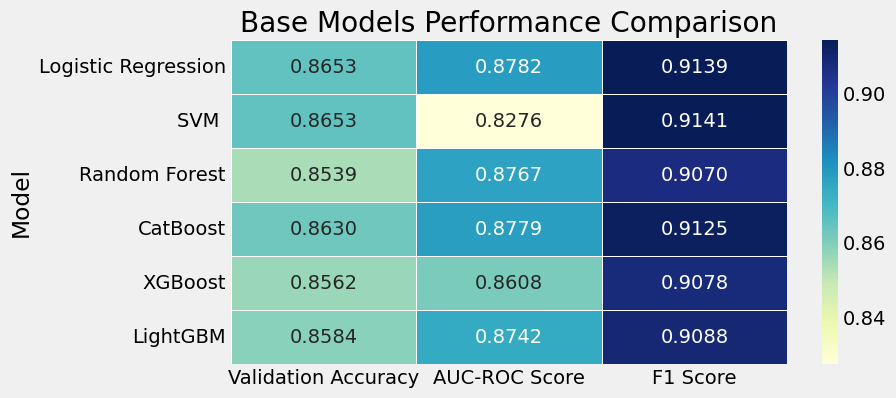

In [87]:
# Performance Data for Base Models
performance_data = {
    "Model": ["Logistic Regression", "SVM ", "Random Forest", "CatBoost", "XGBoost", "LightGBM"],
    "Validation Accuracy": [lg_accuracy, svm_accuracy, rf_accuracy, cat_accuracy, xgb_accuracy, lgbm_accuracy],
    "AUC-ROC Score": [lg_roc_auc, svm_roc_auc, rf_roc_auc, cat_roc_auc, xgb_roc_auc, lgbm_roc_auc],
    "F1 Score": [lg_f1_score, svm_f1_score, rf_f1_score, cat_f1_score, xgb_f1_score, lgbm_f1_score]
}

# Convert to DataFrame
performance_df = pd.DataFrame(performance_data)

# Set model names as index
performance_df.set_index("Model", inplace=True)

# Plot
plt.figure(figsize=(8, 4))
sns.heatmap(performance_df, annot=True, cmap="YlGnBu", fmt=".4f", linewidths=0.5)

plt.title("Base Models Performance Comparison")
plt.show()

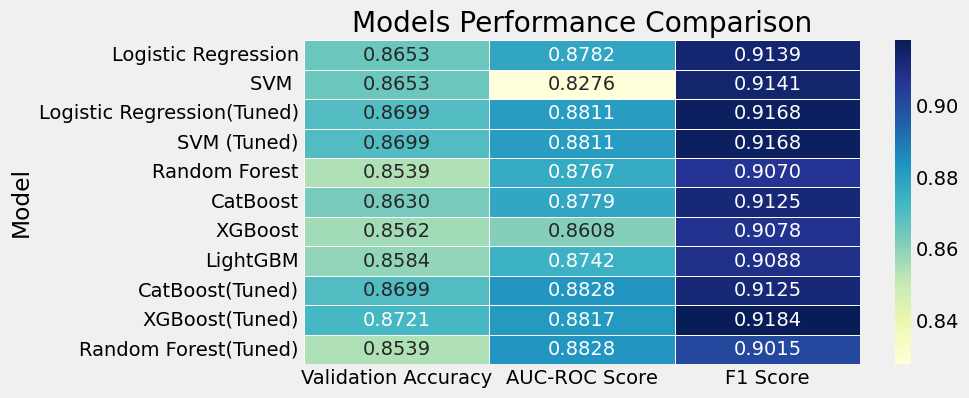

C:\Users\USER\AppData\Local\Temp\ipykernel_19580\1949739506.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y=performance_df["AUC-ROC Score"], palette="viridis")


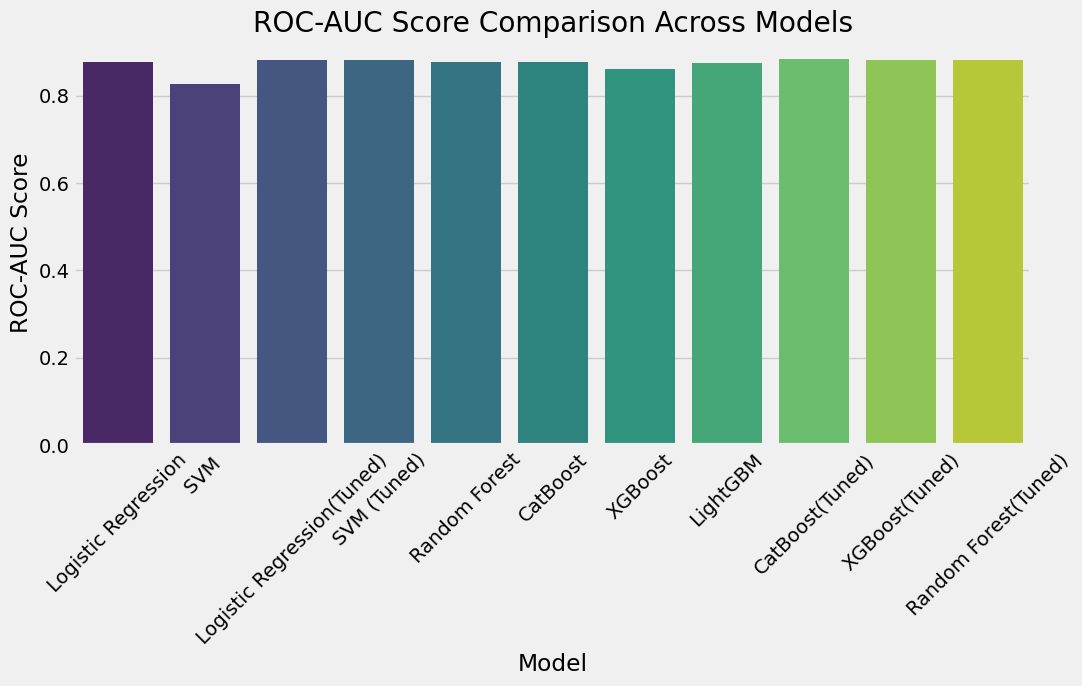

In [88]:
# Performance Data for Models
performance_data = {
    "Model": ["Logistic Regression", "SVM ","Logistic Regression(Tuned)", "SVM (Tuned)", "Random Forest", "CatBoost", "XGBoost", "LightGBM","CatBoost(Tuned)", "XGBoost(Tuned)", "Random Forest(Tuned)"],
    "Validation Accuracy": [lg_accuracy, svm_accuracy, lg_accuracy_best, svm_accuracy_best, rf_accuracy, cat_accuracy, xgb_accuracy, lgbm_accuracy, cat_accuracy_best, xgb_accuracy_best, rf_accuracy_best],
    "AUC-ROC Score": [lg_roc_auc, svm_roc_auc, lg_roc_auc_best, svm_auc_roc_best, rf_roc_auc, cat_roc_auc, xgb_roc_auc, lgbm_roc_auc, cat_roc_auc_best, xgb_roc_auc_best, rf_roc_auc_best],
    "F1 Score": [lg_f1_score, svm_f1_score, lg_f1_best, svm_f1_score_best, rf_f1_score, cat_f1_score, xgb_f1_score, lgbm_f1_score, cat_f1_score, xgb_f1_score_best, rf_f1_score_best]
}

# Convert to DataFrame
performance_df = pd.DataFrame(performance_data)

# Set model names as index
performance_df.set_index("Model", inplace=True)

# Plot
plt.figure(figsize=(8, 4))
sns.heatmap(performance_df, annot=True, cmap="YlGnBu", fmt=".4f", linewidths=0.5)

plt.title("Models Performance Comparison")
plt.show()

# Bar Chart - ROC-AUC Score Comparison
plt.figure(figsize=(11, 5))
sns.barplot(x=performance_df.index, y=performance_df["AUC-ROC Score"], palette="viridis")
plt.title("ROC-AUC Score Comparison Across Models")
plt.ylabel("ROC-AUC Score")
plt.xticks(rotation=45)
plt.show()

## Confusion Matrix

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrices(models, y_true, y_preds, labels=["Negative", "Positive"]):
    num_models = len(models)
    cols = 3
    rows = (num_models + cols - 1) // cols  # Round up for incomplete rows

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = np.array(axes).reshape(-1)  # Flatten even if rows=1

    for i, model_name in enumerate(models):
        cm = confusion_matrix(y_true, y_preds[i])
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                    xticklabels=labels, yticklabels=labels, ax=axes[i])
        axes[i].set_title(f"Confusion Matrix: {model_name}")
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("Actual")

    # Hide any unused subplots
    for j in range(len(models), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

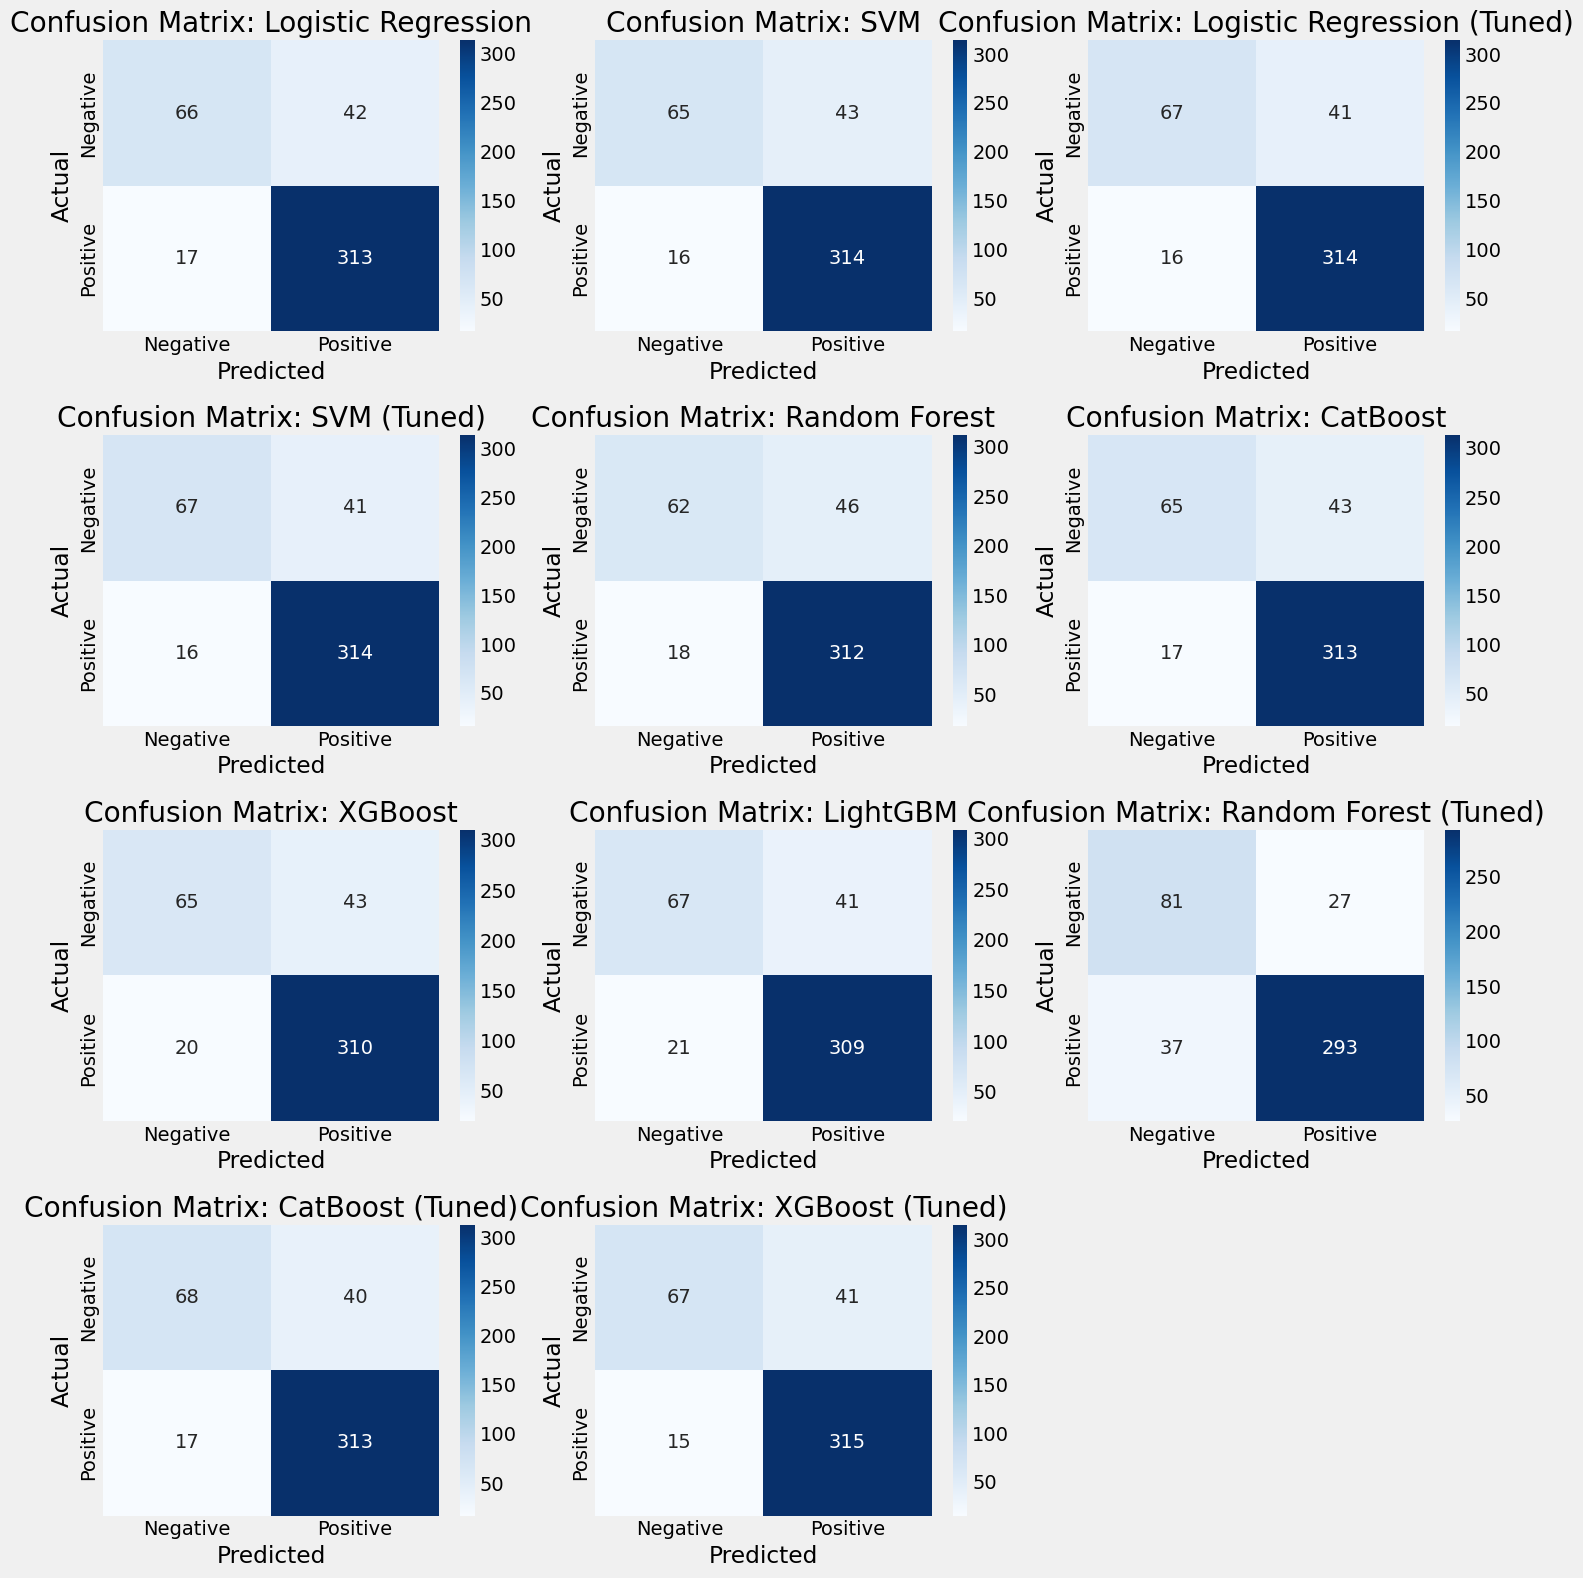

In [90]:
models = ["Logistic Regression", "SVM", "Logistic Regression (Tuned)", "SVM (Tuned)","Random Forest", "CatBoost", "XGBoost", "LightGBM",
    "Random Forest (Tuned)", "CatBoost (Tuned)", "XGBoost (Tuned)"]

y_preds = [y_pred_lg, y_pred_svm, y_pred_val, y_pred_val, y_pred_rf, y_pred_cat, y_pred_xgb, y_pred_lgbm, y_pred_rf_best, y_pred_cat_best, y_pred_xgb_best]

plot_confusion_matrices(models, y_val, y_preds)

# Model Testing 

In [91]:
# Logistic regression
test_pred_lg = model_lg.predict(test_scaled)
# SVM
test_pred_svm = model_svm.predict(test_scaled)
#RF
test_pred_rf = rf_model.predict(test_scaled)
#XGB
test_pred_xgb = xgb_model.predict(test_scaled)
#CatBoost
test_pred_cat = cat_model.predict(test_scaled)
#LGBM
test_pred_lgbm = lgbm_model.predict(test_scaled)

## Saving Model Predictions

In [92]:
# saving model predictions
# Convert predictions into a DataFrame
submission_lg = pd.DataFrame({'id': test_ids['id'], 'Rainfall': test_pred_lg})
submission_svm = pd.DataFrame({'id': test['id'], 'Rainfall': test_pred_lg})
submission_rf = pd.DataFrame({'id': test_ids['id'], 'Rainfall': test_pred_rf})
submission_xgb = pd.DataFrame({'id': test_ids['id'], 'Rainfall': test_pred_xgb})
submission_cat = pd.DataFrame({'id': test_ids['id'], 'Rainfall': test_pred_cat})
submission_lgbm = pd.DataFrame({'id': test_ids['id'], 'Rainfall': test_pred_lgbm})

# Save predictions
submission_lg.to_csv('predictions_lg4.csv', index=False)
submission_svm.to_csv('predictions_svm3.csv', index=False)
submission_rf.to_csv('predictions_rf.csv', index=False)
submission_xgb.to_csv('predictions_xgb.csv', index=False)
submission_cat.to_csv('predictions_cat.csv', index=False)
submission_lgbm.to_csv('predictions_lgbm.csv', index=False)

print("Predictions saved successfully!")

Predictions saved successfully!


# Hyper Parameter Tuning

## Cat Boost Tuning

In [95]:
# Base CatBoost model
cat = CatBoostClassifier(verbose=0, random_state=42)

# Hyperparameter grid
param_grid_cat = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300]
}

# GridSearchCV
grid_cat = GridSearchCV(cat, param_grid_cat, scoring='accuracy', cv=3, n_jobs=-1)
grid_cat.fit(X_train, y_train)

# Best model
print("Best accuracy Score:", grid_cat.best_score_)
print("Best Parameters for CatBoost:", grid_cat.best_params_)
cat_model_best = grid_cat.best_estimator_

Best accuracy Score: 0.8715753424657534
Best Parameters for CatBoost: {'depth': 8, 'iterations': 300, 'learning_rate': 0.01}


In [62]:
# Predict labels for the test data
test_pred_cat_best = cat_model_best.predict(test_scaled)

In [63]:
#validation testing
y_pred_cat_best = cat_model_best.predict(X_val)
y_prob_cat_best = cat_model_best.predict_proba(X_val)[:, 1]

In [64]:
# Save predictions to CSV
submission_cat_best = pd.DataFrame({
    'id': test_ids['id'],
    'Rainfall': test_pred_cat_best
})

submission_cat_best.to_csv('predictions_cat_tuned.csv', index=False)
print("CatBoost Tuned Model Test Predictions saved successfully!")

CatBoost Tuned Model Test Predictions saved successfully!


## XGBoost Tuning

In [96]:
# Base XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameter grid
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0]
}

# GridSearchCV
grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='accuracy', cv=3, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Best model
print("Best accuracy Score:", grid_xgb.best_score_)
print("Best Parameters for XGBoost:", grid_xgb.best_params_)
xgb_model_best = grid_xgb.best_estimator_

Best accuracy Score: 0.8658675799086758
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:58:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [66]:
# Predict labels for the test data
test_pred_xgb_best = xgb_model_best.predict(test_scaled)

In [67]:
# Validation testing
y_pred_xgb_best = xgb_model_best.predict(X_val)
y_prob_xgb_best = xgb_model_best.predict_proba(X_val)[:, 1]

In [68]:
# Save predictions to CSV
submission_xgb_best = pd.DataFrame({
    'id': test_ids['id'],
    'Rainfall': test_pred_xgb_best
})

submission_xgb_best.to_csv('predictions_xgb_tuned.csv', index=False)
print("XGBoost Tuned Model Test Predictions saved successfully!")

XGBoost Tuned Model Test Predictions saved successfully!


## Random Forest Tuning

In [97]:
# Base Random Forest model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='accuracy', cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best model
print("Best accuracy Score:", grid_rf.best_score_)
print("Best Parameters for Random Forest:", grid_rf.best_params_)
rf_model_best = grid_rf.best_estimator_

Best accuracy Score: 0.8681506849315067
Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [70]:
# Predict labels for the test data
test_pred_rf_best = rf_model_best.predict(test_scaled)

In [71]:
# Validation testing
y_pred_rf_best = rf_model_best.predict(X_val)
y_prob_rf_best = rf_model_best.predict_proba(X_val)[:, 1]

In [72]:
# Save predictions to CSV
submission_rf_best = pd.DataFrame({
    'id': test_ids['id'],
    'Rainfall': test_pred_rf_best
})

submission_rf_best.to_csv('predictions_rf_tuned.csv', index=False)
print("RF Tuned Model Test Predictions saved successfully!")

RF Tuned Model Test Predictions saved successfully!


## SVM Tuning

In [98]:
param_grid = {
    'C': [0.1, 1, 10, 100],            
    'gamma': [0.001, 0.01, 0.1, 1],    
    'kernel': ['rbf']                  
}

svm = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',     
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best accuracy Score:", grid_search.best_score_)
svm_best = grid_search.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best accuracy Score: 0.8664383561643835


In [74]:
# Predict class labels for validation data
y_pred_val = svm_best.predict(X_val)

# Predict probabilities for validation data
y_prob_val = svm_best.predict_proba(X_val)[:, 1]

svm_accuracy_best = accuracy_score(y_val, y_pred_val)
svm_roc_auc_best = roc_auc_score(y_val, y_prob_val)
svm_f1_score_best = f1_score(y_val, y_pred_val)

print(f"\nSupport Vector (Tuned) Validation Metrics:")
print(f"Accuracy: {svm_accuracy_best:.4f}")
print(f"AUC-ROC: {svm_roc_auc_best:.4f}")
print(f"F1 Score: {svm_f1_score_best:.4f}")


Support Vector (Tuned) Validation Metrics:
Accuracy: 0.8584
AUC-ROC: 0.8782
F1 Score: 0.9104


In [75]:
# Predict class labels for test data
test_pred_svm = svm_best.predict(test_scaled)

# Predict probabilities for test data (if needed)
y_prob_test = svm_best.predict_proba(test_scaled)[:, 1]

In [76]:
# Predict class labels for test data
test_pred_svm_best = svm_best.predict(test_scaled)

# Save predictions to CSV
submission_svm_best = pd.DataFrame({
    'id': test_ids['id'],
    'Rainfall': test_pred_svm_best
})

submission_svm_best.to_csv('predictions_svm_tuned.csv', index=False)
print("SVM Tuned Model Test Predictions saved successfully!")

SVM Tuned Model Test Predictions saved successfully!


## Logistic regression tuning

In [99]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],            
    'penalty': ['l2'],                      
    'solver': ['lbfgs', 'liblinear']      
}

lg = LogisticRegression(max_iter=1000, random_state=42)

# --- Grid Search ---
grid_search = GridSearchCV(
    estimator=lg,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best accuracy Score:", grid_search.best_score_)

# --- Best model from GridSearch ---
lg_best = grid_search.best_estimator_

# --- Validation Set Evaluation ---
y_pred_val = lg_best.predict(X_val)
y_prob_val = lg_best.predict_proba(X_val)[:, 1]

lg_accuracy_best = accuracy_score(y_val, y_pred_val)
lg_roc_auc_best = roc_auc_score(y_val, y_prob_val)
lg_f1_best = f1_score(y_val, y_pred_val)

print(f"\nLogistic Regression (Tuned) Validation Metrics:")
print(f"Accuracy: {lg_accuracy_best:.4f}")
print(f"AUC-ROC: {lg_roc_auc_best:.4f}")
print(f"F1 Score: {lg_f1_best:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy Score: 0.86189010989011

Logistic Regression (Tuned) Validation Metrics:
Accuracy: 0.8744
AUC-ROC: 0.8818
F1 Score: 0.9190


In [78]:
# --- Test Prediction for Submission ---
test_pred_lg_best = lg_best.predict(test_scaled)
submission_lg_best = pd.DataFrame({'id': test_ids['id'], 'Rainfall': test_pred_lg_best})
submission_lg_best.to_csv('predictions_lg_tuned.csv', index=False)
print("✅ Logistic Regression tuned predictions saved to 'predictions_lg_tuned.csv'")

✅ Logistic Regression tuned predictions saved to 'predictions_lg_tuned.csv'


# Class Balancing

## Random Forest Balancing 

In [79]:
class_weight_options = [
    {0: 1, 1: 1}, 
    {0: 1, 1: 2},  
    {0: 1, 1: 3},  
    {0: 1, 1: 4},  
    {0: 0.5, 1: 1.5},  
    "balanced"  
]

In [80]:
# Random Forest (Balanced)
param_grid_rf = {
    'class_weight': class_weight_options,
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

rf_model_blncd = RandomForestClassifier(random_state=42)
grid_search_rf_blncd = GridSearchCV(rf_model_blncd, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_rf_blncd.fit(X_train, y_train)

print("Best RF Parameters:", grid_search_rf_blncd.best_params_)
rf_model_blncd = grid_search_rf_blncd.best_estimator_

test_pred_rf_blncd = rf_model_blncd.predict(test_scaled)
submission_rf_blncd = pd.DataFrame({'id': test_ids['id'], 'Rainfall': test_pred_rf_blncd})
submission_rf_blncd.to_csv('predictions_rf_blncd.csv', index=False)
print("RF Balanced predictions saved successfully!")

Best RF Parameters: {'class_weight': {0: 1, 1: 4}, 'max_depth': 10, 'n_estimators': 100}
RF Balanced predictions saved successfully!


In [81]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# --- Random Forest ---
rf_preds = rf_model_blncd.predict(X_val)
rf_probs = rf_model_blncd.predict_proba(X_val)[:, 1]
rf_accuracy_blncd = accuracy_score(y_val, rf_preds)
rf_f1_blncd = f1_score(y_val, rf_preds)
rf_auc_blncd = roc_auc_score(y_val, rf_probs)

print(f"Random Forest (Balanced) - Accuracy: {rf_accuracy_blncd:.4f}, F1: {rf_f1_blncd:.4f}, ROC-AUC: {rf_auc_blncd:.4f}")

Random Forest (Balanced) - Accuracy: 0.8516, F1: 0.9065, ROC-AUC: 0.8838


## Logistic Regression model balancing

In [103]:
param_grid_lg = {
    'class_weight': class_weight_options,
    'C': [0.1, 1, 10]  # Optionally tune regularization strength
    
}

lg_model_blncd = LogisticRegression(solver='liblinear')
grid_search_lg_blncd = GridSearchCV(lg_model_blncd, param_grid_lg, scoring='roc_auc', cv=5)
grid_search_lg_blncd.fit(X_train, y_train)

print("Best Class Weight for Logistic Regression:", grid_search_lg_blncd.best_params_)
print("Best Score:", grid_search_lg_blncd.best_score_)

Best Class Weight for Logistic Regression: {'C': 0.1, 'class_weight': 'balanced'}
Best Score: 0.884539865373867


In [105]:
lg_model_blncd = grid_search_lg_blncd.best_estimator_

test_pred_lg_blncd = lg_model_blncd.predict(test_scaled)

submission_lg_blncd = pd.DataFrame({
    'id': test_ids['id'], 
    'Rainfall': test_pred_lg_blncd
})

submission_lg_blncd.to_csv('predictions_lg_blncd.csv', index=False)

print("Predictions saved successfully!")

Predictions saved successfully!


## XGBoost model balancing

In [109]:
xgb_model_blncd = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

pos_weight_values = np.linspace(1, 10, 5) 

param_grid_xgb = {'scale_pos_weight': pos_weight_values}

grid_search_xgb_blncd = GridSearchCV(xgb_model_blncd, param_grid_xgb, scoring='roc_auc', cv=5)
grid_search_xgb_blncd.fit(X_train, y_train)

print("Best scale_pos_weight:", grid_search_xgb_blncd.best_params_)
print("Best ROC-AUC Score:", grid_search_xgb_blncd.best_score_)

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

Best scale_pos_weight: {'scale_pos_weight': 1.0}
Best ROC-AUC Score: 0.8615889245299831


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [124]:
xgb_model_blncd = grid_search_xgb_blncd.best_estimator_

test_pred_xgb_blncd = xgb_model_blncd.predict(test_scaled)

submission_xgb_blncd = pd.DataFrame({
    'id': test_ids['id'], 
    'Rainfall': test_pred_xgb_blncd
})

submission_xgb_blncd.to_csv('predictions_xgb_blncd.csv', index=False)

print("Predictions saved successfully!")

Predictions saved successfully!


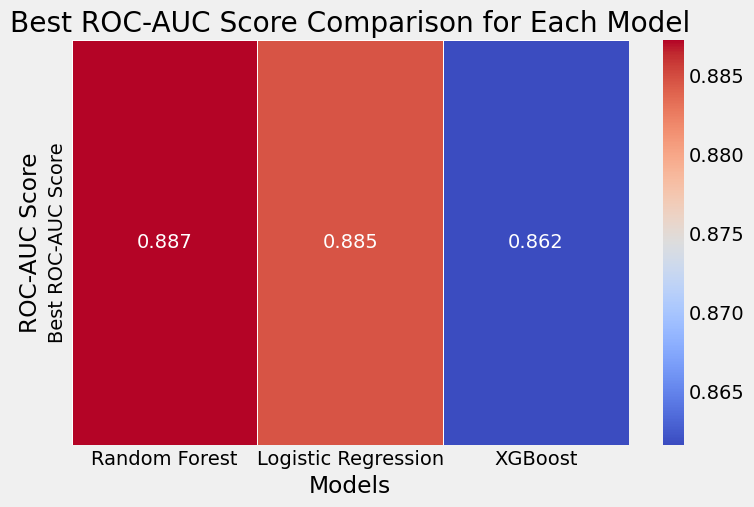

In [127]:
best_scores = {
    "Random Forest": grid_search_rf_blncd.best_score_,
    "Logistic Regression": grid_search_lg_blncd.best_score_,
    "XGBoost": grid_search_xgb_blncd.best_score_
}

# Convert to DataFrame
df_best_scores = pd.DataFrame(best_scores, index=["Best ROC-AUC Score"])

# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_best_scores, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)

# Set labels and title
plt.xlabel("Models")
plt.ylabel("ROC-AUC Score")
plt.title("Best ROC-AUC Score Comparison for Each Model")

# Show the plot
plt.show()

## Stacking Model

In [133]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('cat', cat_model_best),
    ('lg', lg_model_blncd),
    ('xgb', xgb_model_best)
]

final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# Build stacking classifier
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=3,
    n_jobs=-1
)

# Fit on training data 
stack_model.fit(X_train, y_train)

,estimators,"[('cat', ...), ('lg', ...), ...]"
,final_estimator,LogisticRegre...ndom_state=42)
,cv,3
,stack_method,'auto'
,n_jobs,-1
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1


📊 Cross-validated ROC-AUC for Stacked Model: 0.8894


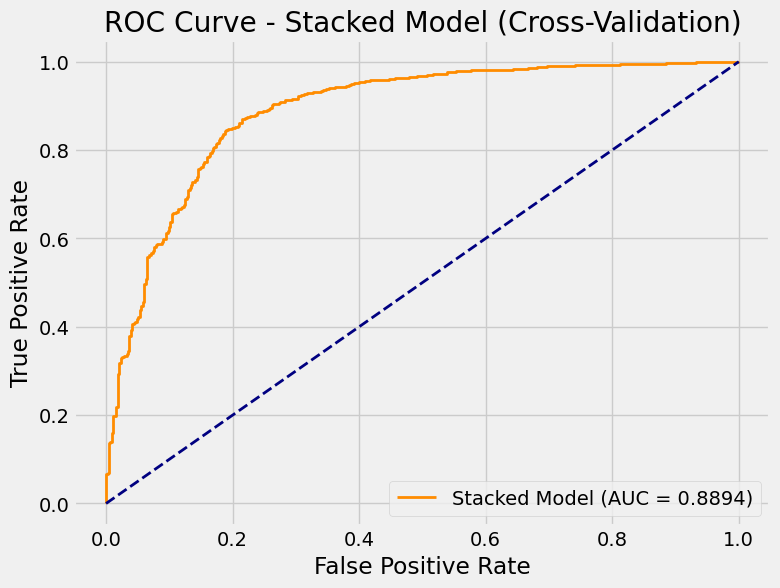

In [134]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Add cross-validation (StratifiedKFold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Get cross-validated predicted probabilities for ROC
y_pred_cv_proba = cross_val_predict(
    stack_model, 
    X_train, 
    y_train, 
    cv=cv, 
    method='predict_proba', 
    n_jobs=-1
)[:, 1] 

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred_cv_proba)
roc_auc = auc(fpr, tpr)

print(f"📊 Cross-validated ROC-AUC for Stacked Model: {roc_auc:.4f}")

# Step 2: Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Stacked Model (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacked Model (Cross-Validation)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [136]:
# Predict on validation set
y_pred_stack = stack_model.predict(X_val)
y_prob_stack = stack_model.predict_proba(X_val)[:, 1]

# Evaluate performance
stack_accuracy = accuracy_score(y_val, y_pred_stack)
stack_roc_auc = roc_auc_score(y_val, y_prob_stack)
stack_f1 = f1_score(y_val, y_pred_stack)

print("\n📊 Stacked Model Validation Metrics:")
print(f"Accuracy: {stack_accuracy:.4f}")
print(f"AUC-ROC: {stack_roc_auc:.4f}")
print(f"F1 Score: {stack_f1:.4f}")

# Predict on test set and save submission
test_pred_stack = stack_model.predict(test_scaled)
submission_stack = pd.DataFrame({'id': test_ids['id'], 'Rainfall': test_pred_stack})
submission_stack.to_csv('predictions_stacked_final.csv', index=False)
print(" Stacked model predictions saved to 'predictions_stacked.csv'")


📊 Stacked Model Validation Metrics:
Accuracy: 0.8767
AUC-ROC: 0.8861
F1 Score: 0.9206
 Stacked model predictions saved to 'predictions_stacked.csv'


In [137]:
import joblib

# Save the trained stacking model
joblib.dump(stack_model, 'stacked_rainfall_model.pkl')

['stacked_rainfall_model.pkl']